# Machine Learning: Clustering Similar Books to Output a Recommender Function

The goal of this machine learning portion is to use unsupervised learning (clustering) to identify similar books based on decription, first words (proxy for writing style), genre, and author to create an automated book recommendation system for readers. 

The result is a function for readers to input their favorite book; the output will be a list of recommend more books from the same cluster based on readers' preferences.

We trained different categorical/text/quantitative variables to find a model that minimizes error.


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/Data Science Final Project/"

Mounted at /content/drive


In [3]:
#read in data 
df_books = pd.read_csv(data_dir + "books_clean.csv")
df_books

,title,author,book_index,book_url,avg_rating,genre,description,publication_year,first_sentence,number_of_reviews,image_url
0,And Then There Were None,Agatha Christie,0,https://www.librarything.com//work/7962202,4.14,"['Fiction and Literature', 'Mystery']","Ten houseguests, trapped on an isolated island...",1939,In the corner of a first-class smoking carriag...,500,https://images-na.ssl-images-amazon.com/images...
1,Murder on the Orient Express,Agatha Christie,1,https://www.librarything.com//work/2742,4.07,"['Fiction and Literature', 'Mystery']","Agatha Christie's most famous murder mystery, ...",1934,It was five o'clock on a winter's morning in S...,394,https://images-na.ssl-images-amazon.com/images...
2,The Murder of Roger Ackroyd,Agatha Christie,2,https://www.librarything.com//work/3011,4.06,"['Fiction and Literature', 'Mystery']",Agatha Christie's most daring crime mystery - ...,1926,Mrs Ferrars died on the night of the 16th-17th...,291,https://images-na.ssl-images-amazon.com/images...
3,The Mysterious Affair at Styles,Agatha Christie,3,https://www.librarything.com//work/2921950,3.75,"['Fiction and Literature', 'Mystery']","Set in the summer of 1917, the story follows t...",1920,The intense interest aroused in the public by ...,261,https://images-na.ssl-images-amazon.com/images...
4,Death on the Nile,Agatha Christie,4,https://www.librarything.com//work/29995,3.93,"['Fiction and Literature', 'Mystery']","Linnet Doyle is young, beautiful, and rich. Sh...",1937,'Linnet Ridgeway!',168,https://images-na.ssl-images-amazon.com/images...
...,...,...,...,...,...,...,...,...,...,...,...
24966,Cadillac Jukebox,James Lee Burke,24966,https://www.librarything.com//work/82967,3.80,"['Fiction and Literature', 'Mystery']","A Louisiana farmer is jailed for the murder, 3...",1996,Aaron Crown should not have come back into our...,13,https://images-na.ssl-images-amazon.com/images...
24967,Sunset Limited,James Lee Burke,24967,https://www.librarything.com//work/16445,3.75,"['Fiction and Literature', 'Mystery']",Detective Dave Robicheaux returns to center st...,1998,I had seen a dawn like this one only twice in ...,10,https://images-na.ssl-images-amazon.com/images...
24968,Crusader's Cross,James Lee Burke,24968,https://www.librarything.com//work/32025,3.97,"['Fiction and Literature', 'Mystery']",A conversation between Robicheaux and a dying ...,2005,"It was the end of an era, one that I suspect h...",28,https://images-na.ssl-images-amazon.com/images...
24969,Burning Angel,James Lee Burke,24969,https://www.librarything.com//work/70226,3.83,"['Fiction and Literature', 'Mystery']","Dave Robicheaux, New Orleans detective, is puz...",1995,The Giacano family had locked up the action in...,16,https://images-na.ssl-images-amazon.com/images...


# Create a recommender function based on calculating distances

In the section below, we are going to write a function that reads in a book title input and provides a list of books as similar books for recommendation purposes using pairwise distance calculations. The four functions can provide book recommendations of the 10 books with the closest distances with the given book based on different features.

In [6]:
#recommendation based on genre and author
def book_recommender(book_name):
  df_books = pd.read_csv("/content/books_clean.csv")
  number = df_books[df_books['title'].str.strip() == book_name].index[0]
  df_model = df_books[["author", "genre"]]
  df_comparison = pd.get_dummies(df_model)
  scaler = StandardScaler()
  scaler.fit(df_comparison)
  df_comparison_st = scaler.transform(df_comparison)
  target_book = df_comparison_st[[number],:]
  other = df_comparison_st
  distanceForSim = pairwise_distances(target_book, other)
  RecBookRowNums = distanceForSim[0].argsort()[:10]
  return df_books.loc[RecBookRowNums].sort_values("avg_rating", ascending=False)



book_recommender('Madame Bovary')

,title,author,book_index,book_url,avg_rating,genre,description,publication_year,first_sentence,number_of_reviews,image_url
4123,Madame Bovary [Norton Critical Edition],Gustave Flaubert,4123,https://www.librarything.com//work/11208261,3.99,"['Fiction and Literature', 'General Fiction']",Margaret Cohen's careful editorial revision mo...,1857,NaN,8,https://pics.cdn.librarything.com/picsizes/01/...
4120,Bouvard and Pécuchet,Gustave Flaubert,4120,https://www.librarything.com//work/91534,3.84,"['Fiction and Literature', 'General Fiction']","In his own words, the novel is ""a kind of ency...",1881,"With the temperature up in the nineties, the B...",18,https://images-na.ssl-images-amazon.com/images...
4117,Sentimental Education,Gustave Flaubert,4117,https://www.librarything.com//work/16036,3.83,"['Fiction and Literature', 'General Fiction']",Frederic Moreau is a law student returning hom...,1869,On the morning of 15 September 1840 the Ville ...,56,https://images-na.ssl-images-amazon.com/images...
4116,Madame Bovary,Gustave Flaubert,4116,https://www.librarything.com//work/11837,3.74,"['Fiction and Literature', 'General Fiction']","In ""Madame Bovary,"" his story of a shallow, de...",1857,We were in study hall when the headmaster walk...,365,https://images-na.ssl-images-amazon.com/images...
4121,The Temptation of Saint Anthony,Gustave Flaubert,4121,https://www.librarything.com//work/121210,3.71,"['Fiction and Literature', 'General Fiction']",A book that deeply influenced the young Freud ...,1874,"The setting is the Thebaid, high on a mountain...",9,https://images-na.ssl-images-amazon.com/images...
4119,Salammbô,Gustave Flaubert,4119,https://www.librarything.com//work/3083906,3.71,"['Fiction and Literature', 'General Fiction', ...",Translated by Hugh Tredennick and Harold Tarra...,1862,"C'était à Mégara, faubourg de Carthage, dans l...",28,https://images-na.ssl-images-amazon.com/images...
4118,Three Tales,Gustave Flaubert,4118,https://www.librarything.com//work/18352,3.66,"['Fiction and Literature', 'General Fiction']",Three Tales offers an excellent introduction t...,1877,"Pendant un demi-siècle, les bourgeoises de Pon...",36,https://images-na.ssl-images-amazon.com/images...
4124,November,Gustave Flaubert,4124,https://www.librarything.com//work/1305547,3.65,"['Fiction and Literature', 'General Fiction']","An intense, passionate, and profoundly moving ...",1842,NaN,5,https://images-na.ssl-images-amazon.com/images...
4122,A Simple Heart,Gustave Flaubert,4122,https://www.librarything.com//work/20176,3.52,"['Fiction and Literature', 'General Fiction']","In A Simple Heart, the poignant story that ins...",1877,For half a century past the good folk of Pont-...,20,https://images-na.ssl-images-amazon.com/images...
4125,Memoirs of a Madman,Gustave Flaubert,4125,https://www.librarything.com//work/109527,3.28,"['Fiction and Literature', 'General Fiction']","One of Flaubert's earliest writings, but publi...",1838,NaN,1,https://images-na.ssl-images-amazon.com/images...


In [7]:
#recommender based on the description of the book
def book_recommender(book_name):
  df_books = pd.read_csv("/content/books_clean.csv")
  number = df_books[df_books['title'].str.strip() == book_name].index[0]
  df_model = df_books['description']
  vec = TfidfVectorizer()
  vec.fit(df_model)
  transform = vec.transform(df_model)
  target_book = transform[[number],:]
  other = transform
  distanceForSim = pairwise_distances(target_book, other)
  RecBookRowNums = distanceForSim[0].argsort()[:10]
  return df_books.loc[RecBookRowNums].sort_values("avg_rating", ascending=False)

book_recommender('The Great Gatsby')

,title,author,book_index,book_url,avg_rating,genre,description,publication_year,first_sentence,number_of_reviews,image_url
9586,The Best Early Stories of F. Scott Fitzgerald ...,F. Scott Fitzgerald,9586,https://www.librarything.com//work/686841,3.95,"['Fiction and Literature', 'General Fiction']",Edited and with an Introduction by Bryant Mang...,2005,NaN,1,https://images-na.ssl-images-amazon.com/images...
4102,The Crack-Up,F. Scott Fitzgerald,4102,https://www.librarything.com//work/82107,3.86,"['Fiction and Literature', 'Biography & Memoir']",Compiled and published after Fitzgerald's deat...,1945,NaN,10,https://images-na.ssl-images-amazon.com/images...
4094,The Great Gatsby,F. Scott Fitzgerald,4094,https://www.librarything.com//work/2964,3.85,"['Fiction and Literature', 'General Fiction']","After the Great War, the mysterious Jay Gatsby...",1925,In my younger and more vulnerable years my fat...,1088,https://pics.cdn.librarything.com/picsizes/3c/...
9590,May Day,F. Scott Fitzgerald,9590,https://www.librarything.com//work/8188573,3.84,"['Fiction and Literature', 'General Fiction', ...",Although F. Scott Fitzgerald is known for the ...,1920,NaN,1,https://images-na.ssl-images-amazon.com/images...
8458,Sleepovers,Jacqueline Wilson,8458,https://www.librarything.com//work/706148,3.82,"['Children\'s Books""', 'Fiction and Literature']","Amy, Bella, Chloe, Daisy and Emily are friends...",2001,NaN,4,https://pics.cdn.librarything.com/picsizes/65/...
4114,I'd Die For You: And Other Lost Stories,F. Scott Fitzgerald,4114,https://www.librarything.com//work/18377582,3.75,"['Fiction and Literature', 'General Fiction']",A collection including the last complete unpub...,2017,NaN,2,https://pics.cdn.librarything.com/picsizes/4a/...
9587,The Great Gatsby / Tender Is The Night / The L...,F. Scott Fitzgerald,9587,https://www.librarything.com//work/325667,3.69,"['Fiction and Literature', 'General Fiction']","Enjoying a spectacular surge in popularity, F....",1953,NaN,1,https://pics.cdn.librarything.com/picsizes/74/...
18866,Neferet's Curse,P. C. Cast,18866,https://www.librarything.com//work/12657532,3.65,"['Fiction and Literature', 'Young Adult']","""The White City, 1893: In turn-of-the-century ...",2013,NaN,18,https://images-na.ssl-images-amazon.com/images...
20025,Neferet's Curse,P. C. Cast,20025,https://www.librarything.com//work/12657532,3.65,"['Fiction and Literature', 'Young Adult']","""The White City, 1893: In turn-of-the-century ...",2013,NaN,18,https://images-na.ssl-images-amazon.com/images...
3098,The Mysteries of Pittsburgh,Michael Chabon,3098,https://www.librarything.com//work/3230,3.56,"['Fiction and Literature', 'General Fiction', ...","Michael Chabon masterfully renders the funny, ...",1988,At the beginning of the summer I had lunch wit...,63,https://images-na.ssl-images-amazon.com/images...


In [8]:
#recommender based on the first sentence/style of the book
def book_recommender(book_name):
  df_books = pd.read_csv("/content/books_clean.csv")
  number = df_books[df_books['title'].str.strip() == book_name].index[0]
  df_model = df_books['first_sentence'].dropna()
  vec = TfidfVectorizer()
  vec.fit(df_model)
  transform = vec.transform(df_model)
  target_book = transform[[number],:]
  other = transform
  distanceForSim = pairwise_distances(target_book, other)
  RecBookRowNums = distanceForSim[0].argsort()[:10]
  return df_books.loc[RecBookRowNums].sort_values("avg_rating", ascending=False)

book_recommender('The Awakening')

,title,author,book_index,book_url,avg_rating,genre,description,publication_year,first_sentence,number_of_reviews,image_url
5138,The Cider House Rules,John Irving,5138,https://www.librarything.com//work/7863,4.07,"['Fiction and Literature', 'General Fiction']","First published in 1985, The Cider House Rules...",1985,In the hospital of the orphanage--the boys' di...,149,https://images-na.ssl-images-amazon.com/images...
14274,Heir to Sevenwaters,Juliet Marillier,14274,https://www.librarything.com//work/5161003,4.02,"['Fiction and Literature', 'Fantasy', 'Romance...",After her newborn brother is kidnapped under h...,2008,"My fingers numb with cold, I fastened a length...",29,https://images-na.ssl-images-amazon.com/images...
16271,Nicholas Sparks Box Set: True Believer [and] A...,Nicholas Sparks,16271,https://www.librarything.com//work/14950068,4.00,"['Fiction and Literature', 'Suspense & Thrille...",True believer: As a science journalist with a ...,2008,NaN,None,https://images-na.ssl-images-amazon.com/images...
9287,The Scarpetta Collection Volume I: Postmortem ...,Patricia Cornwell,9287,https://www.librarything.com//work/382416,3.96,"['Fiction and Literature', 'Mystery', 'Suspens...","Fans of Patricia Cornwell, the number one mega...",2003,"Mord am Samstagmorgen:Am Freitag, dem 6. Juni,...",1,https://images-na.ssl-images-amazon.com/images...
7256,The Awakening,Kate Chopin,7256,https://www.librarything.com//work/1663933,3.61,"['Fiction and Literature', 'General Fiction']","The Awakening, originally titled A Solitary So...",1899,"A green and yellow parrot, which hung in a cag...",176,https://images-na.ssl-images-amazon.com/images...
13041,Teeth: Vampire Tales,Ellen Datlow,13041,https://www.librarything.com//work/10140546,3.59,"['Fiction and Literature', 'Horror', 'Fantasy'...",A collection of nineteen original stories of t...,2011,NaN,14,https://images-na.ssl-images-amazon.com/images...
9601,Slay Ride,Dick Francis,9601,https://www.librarything.com//work/71307,3.57,"['Fiction and Literature', 'Mystery']","""When a champion jockey disappears--right befo...",1973,Cold grey water lapped the flimsy-looking side...,17,https://images-na.ssl-images-amazon.com/images...
11659,The 4th Man (short story),Lisa Gardner,11659,https://www.librarything.com//work/18765920,3.56,"['Fiction and Literature', 'Mystery', 'Suspens...",FBI Profiler Pierce Quincy and Officer Rainie ...,2016,"""They're all here?""",8,https://images-na.ssl-images-amazon.com/images...
16222,Claudia and Mean Janine,Ann M. Martin,16222,https://www.librarything.com//work/241212,3.35,"['Fiction and Literature', '""Children\'s Books']",Claudia's participation in the Baby-sitters Cl...,1987,NaN,4,https://images-na.ssl-images-amazon.com/images...
8300,The Cloning of Joanna May,Fay Weldon,8300,https://www.librarything.com//work/91545,3.30,"['Fiction and Literature', 'General Fiction', ...",Fay Weldon delivers a brilliant novel that lay...,1989,This has been a year of strange events: some w...,3,https://pics.cdn.librarything.com/picsizes/50/...


In [9]:
#combine all features
def book_recommender(book_name): 
  df_books = pd.read_csv("/content/books_clean.csv")
  df_model = df_books[['genre','author','publication_year','description','first_sentence']].dropna()
  number = df_books[df_books['title'].str.strip() == book_name].index[0]
  col_transformer = make_column_transformer(
      (OneHotEncoder(handle_unknown="ignore"),['genre']),
      (OneHotEncoder(handle_unknown="ignore"),['author']),
      (StandardScaler(), ["publication_year"]),
      (TfidfVectorizer(max_features = 100), 'description'),
      (TfidfVectorizer(max_features = 100), 'first_sentence'),
      remainder="drop")
  col_transformer.fit(df_model)
  transform = col_transformer.transform(df_model)
  target_book = transform[[number],:]
  other = transform
  distanceForSim = pairwise_distances(target_book, other)
  RecBookRowNums = distanceForSim[0].argsort()[:10]
  return df_books.loc[RecBookRowNums].sort_values("avg_rating", ascending=False)
book_recommender("Madame Bovary")


,title,author,book_index,book_url,avg_rating,genre,description,publication_year,first_sentence,number_of_reviews,image_url
2825,Willy's Pictures,Anthony Browne,2825,https://www.librarything.com//work/915914,4.34,"[""Children's Books""]",Willy the chimp paints pictures that are tribu...,2000,NaN,6,https://images-na.ssl-images-amazon.com/images...
1927,Notes on Grief,Chimamanda Ngozi Adichie,1927,https://www.librarything.com//work/26136269,4.25,"['Nonfiction', 'Biography & Memoir']",A personal and powerful essay on loss from Chi...,2021,"From England, my brother set up the Zoom calls...",15,https://images-na.ssl-images-amazon.com/images...
4818,Der König verneigt sich und tötet,Herta Müller,4818,https://www.librarything.com//work/5231459,4.00,"['Fiction and Literature', 'General Fiction']",I en samling noveller skriver författaren om s...,2003,NaN,3,https://images-na.ssl-images-amazon.com/images...
9534,"The Three Musketeers, Vol 1 (of 2)","Alexandre Dumas, pere",9534,https://www.librarything.com//work/1368273,3.89,"['Fiction and Literature', 'General Fiction', ...","Alexandre Dumas, pere (French for ""father,"" ak...",1844,"Le premier lundi du mois d'avril 1625, le bour...",2,https://pics.cdn.librarything.com/picsizes/8f/...
4116,Madame Bovary,Gustave Flaubert,4116,https://www.librarything.com//work/11837,3.74,"['Fiction and Literature', 'General Fiction']","In ""Madame Bovary,"" his story of a shallow, de...",1857,We were in study hall when the headmaster walk...,365,https://images-na.ssl-images-amazon.com/images...
2191,Invisible,Paul Auster,2191,https://www.librarything.com//work/8278989,3.65,"['Fiction and Literature', 'General Fiction']",Sinuously constructed in four interlocking par...,2009,I shook his hand for the first time in the spr...,103,https://images-na.ssl-images-amazon.com/images...
2423,The Shut Eye,Belinda Bauer,2423,https://www.librarything.com//work/15572729,3.62,"['Fiction and Literature', 'Mystery', 'Suspens...",Five footprints are the only sign that Daniel ...,2015,NaN,27,https://images-na.ssl-images-amazon.com/images...
3188,The Wisdom of Father Brown,G. K. Chesterton,3188,https://www.librarything.com//work/34675,3.56,"['Fiction and Literature', 'Mystery']","From London to Cornwall, then to Italy and Fra...",1913,"The consulting-rooms of Dr. Orion Hood, the em...",14,https://pics.cdn.librarything.com/picsizes/5f/...
5085,Time must have a stop,Aldous Huxley,5085,https://www.librarything.com//work/192051,3.54,"['Fiction and Literature', 'General Fiction', ...","Sebastian Barnack, a handsome English schoolbo...",1944,Sebastian Barnack came out of the reading room...,6,https://images-na.ssl-images-amazon.com/images...
2687,Stars and Bars,William Boyd,2687,https://www.librarything.com//work/171135,3.28,"['Fiction and Literature', 'General Fiction']",All Henderson Dores dreams of is fitting in. B...,1984,NaN,8,https://images-na.ssl-images-amazon.com/images...


##Create a recommender function based on preference clusters

In [10]:
#K-Means
df_books = pd.read_csv("/content/books_clean.csv")
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
df_books = df_books.dropna()
X_train = df_books[['genre','author','publication_year','description','first_sentence']]
col_transformer = make_column_transformer(
      (OneHotEncoder(handle_unknown="ignore"),['genre']),
      (OneHotEncoder(handle_unknown="ignore"),['author']),
      (StandardScaler(), ["publication_year"]),
      (TfidfVectorizer(max_features = 100), 'description'),
      (TfidfVectorizer(max_features = 100), 'first_sentence'),
      remainder="drop")
model = KMeans(n_clusters=5)
pipeline = make_pipeline(
    col_transformer,
    model
)
pipeline.fit(X_train)
centroids = model.cluster_centers_
clusters = model.labels_

assert(len(clusters) == len(df_books))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Identify and analyze book clusters

<Axes: ylabel='Frequency'>

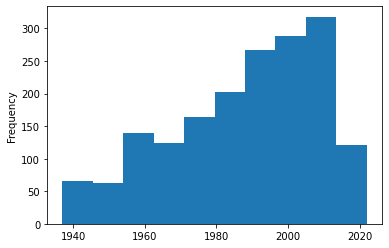

In [11]:
X_train[model.labels_== 0]['publication_year'].plot.hist()

In [12]:
X_train[model.labels_== 0][['author','genre']].value_counts()

author                        genre                                        
Haruki Murakami               ['Fiction and Literature', 'General Fiction']    32
John Irving                   ['Fiction and Literature', 'General Fiction']    28
John Updike                   ['Fiction and Literature', 'General Fiction']    25
Graham Greene                 ['Fiction and Literature', 'General Fiction']    23
Iris Murdoch                  ['Fiction and Literature', 'General Fiction']    23
                                                                               ..
Oleg Zaionchkovsky            ['Fiction and Literature', 'General Fiction']     1
Norman Mailer                 ['Fiction and Literature', 'General Fiction']     1
Nikolai Gogol                 ['Fiction and Literature', 'General Fiction']     1
Giuseppe Tomasi di Lampedusa  ['Fiction and Literature', 'General Fiction']     1
Élie WIESEL                   ['Fiction and Literature', 'General Fiction']     1
Length: 387, dtype: in

<Axes: ylabel='Frequency'>

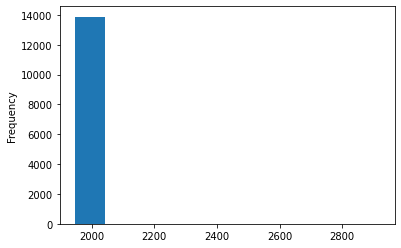

In [13]:
X_train[model.labels_== 1]['publication_year'].plot.hist()

In [14]:
X_train[model.labels_== 1][['author','genre']].value_counts()

author              genre                                                   
Stan Berenstain     ["Children's Books"]                                        98
Clive Cussler       ['Fiction and Literature', 'Suspense & Thriller']           84
Margaret Weis       ['Fiction and Literature', 'Fantasy']                       84
Dr. Seuss           ["Children's Books"]                                        76
René Goscinny       ['Graphic Novels & Comics']                                 66
                                                                                ..
Jeanette Winterson  ['General Fiction', 'Fiction and Literature', 'Fantasy']     1
                    ['LGBTQ+', 'Biography & Memoir']                             1
                    ['LGBTQ+', 'Fiction and Literature', 'General Fiction']      1
Jeaniene Frost      ['Fiction and Literature', 'Fantasy', 'Romance']             1
Åsne Seierstad      ['Nonfiction', 'History', 'Biography & Memoir']              1
Length: 40

<Axes: ylabel='Frequency'>

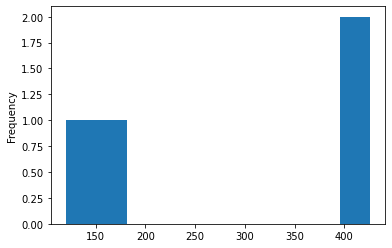

In [15]:
X_train[model.labels_== 2]['publication_year'].plot.hist()

In [16]:
X_train[model.labels_== 2][['author','genre']].value_counts()

author           genre                                                                                   
Apuleius         ['Fiction and Literature', 'General Fiction', 'Fantasy']                                    1
Saint Augustine  ['Philosophy', 'Nonfiction', 'Religion & Spirituality', 'History', 'Biography & Memoir']    1
                 ['Philosophy', 'Nonfiction', 'Religion & Spirituality']                                     1
Suetonius        ['Nonfiction', 'History', 'Biography & Memoir']                                             1
dtype: int64

<Axes: ylabel='Frequency'>

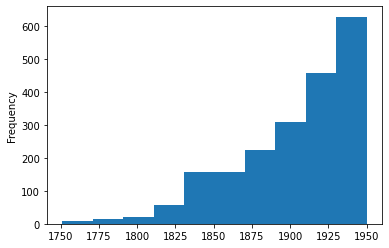

In [17]:
X_train[model.labels_== 3]['publication_year'].plot.hist()

In [18]:
X_train[model.labels_== 3][['author','genre']].value_counts()

author              genre                                                             
Enid Blyton         ['Children\'s Books"', 'Fiction and Literature']                      54
Charles Dickens     ['Fiction and Literature', 'General Fiction']                         37
Henry James         ['Fiction and Literature', 'General Fiction']                         32
Anthony Trollope    ['Fiction and Literature', 'General Fiction']                         31
Agatha Christie     ['Fiction and Literature', 'Mystery']                                 31
                                                                                          ..
H.P. Lovecraft      ['Horror', 'Fiction and Literature', 'General Fiction', 'Fantasy']     1
                    ['Horror', 'Fiction and Literature', 'Fantasy']                        1
H. R. Trevor-Roper  ['History', 'Nonfiction', 'Biography & Memoir']                        1
H. P. Lovecraft     ['Horror', 'Fiction and Literature', 'Science Fiction'] 

<Axes: ylabel='Frequency'>

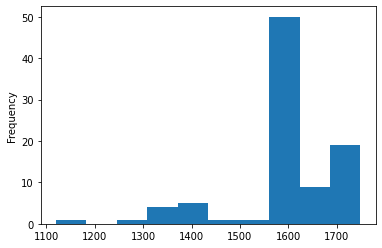

In [19]:
X_train[model.labels_== 4]['publication_year'].plot.hist()

In [20]:
X_train[model.labels_== 4][['author','genre']].value_counts()

author                        genre                                                               
William Shakespeare           ['Fiction and Literature']                                              37
Miguel de Cervantes           ['Fiction and Literature', 'General Fiction']                            6
Dante Alighieri               ['Fiction and Literature']                                               5
Henry Fielding                ['Fiction and Literature', 'General Fiction']                            4
Geoffrey Chaucer              ['Fiction and Literature']                                               4
John Milton                   ['Fiction and Literature']                                               4
Daniel Defoe                  ['Fiction and Literature', 'General Fiction']                            4
Jonathan Swift                ['Fiction and Literature', 'General Fiction']                            2
                              ['Fiction and Literature']     

Inspecting the different clusters, we can see that cluster 0 is mostly classic literature from the 20th Century, cluster 1 is classic literature from the 19th century, cluster 2 is 21st century literature, and cluster 4 is predominantly children's books. (the clusters are different each time we run them, so there might be minor differences)

# Book Recommender Function Based on Clusters

In [21]:
#function for book recommendation
def get_similar_books(title):
    book_index = df_books[df_books['title'].str.strip() == title].index[0]
    cluster = clusters[book_index]
    books_in_cluster = df_books[clusters == cluster]
    return books_in_cluster.sample(10)

get_similar_books('The Great Gatsby')

,title,author,book_index,book_url,avg_rating,genre,description,publication_year,first_sentence,number_of_reviews,image_url
11352,The Bible: A Biography,Karen Armstrong,11352,https://www.librarything.com//work/5720423,3.63,"['Nonfiction', 'Religion & Spirituality', 'His...",Religious historian Armstrong discusses the co...,2007,Human beings are meaning-seeking creatures.,36,https://pics.cdn.librarything.com/picsizes/6a/...
15009,Full Blast,Janet Evanovich,15009,https://www.librarything.com//work/9750530,3.51,"['Fiction and Literature', 'Romance', 'Mystery']",It all starts when Jamie decides to increase r...,2004,Jamie Swift had been in the newspaper business...,23,https://images-na.ssl-images-amazon.com/images...
16458,Quicksilver,Neal Stephenson,16458,https://www.librarything.com//work/4745313,3.90,"['Fiction and Literature', 'Science Fiction', ...","Quicksilver is the story of Daniel Waterhouse,...",2003,Enoch rounds the corner just as the executione...,157,https://images-na.ssl-images-amazon.com/images...
16947,Shadowland,Meg Cabot,16947,https://www.librarything.com//work/63565,3.95,"['Fiction and Literature', 'Fantasy', 'Young A...",Sixteen-year-old Susannah Simon is a mediator ...,2000,They told me there'd be palm trees.,73,https://images-na.ssl-images-amazon.com/images...
3205,But Excuse Me That Is My Book,Lauren Child,3205,https://www.librarything.com//work/318559,3.98,"[""Children's Books""]",When Lola's favorite book is not on the librar...,2005,"I have this little sister, Lola.",29,https://pics.cdn.librarything.com/picsizes/d3/...
24743,The Uplift War,David Brin,24743,https://www.librarything.com//work/19167,3.94,"['Science Fiction', 'Fiction and Literature']",Earth has been allowed to colonize the planet ...,1987,"PreludeHow strange, that such an insignificant...",31,https://images-na.ssl-images-amazon.com/images...
22761,The Walking Dead: Compendium One,Robert Kirkman,22761,https://www.librarything.com//work/8350782,4.23,"['Horror', 'Graphic Novels & Comics']","""An epidemic of apocalyptic proportions has sw...",2009,This is not good.,47,https://images-na.ssl-images-amazon.com/images...
15472,Mystery at the Ski Jump (Nancy Drew #29),Carolyn Keene,15472,https://www.librarything.com//work/67077,3.63,['Fiction and Literature'],The blatant acts of a lady swindler posing as ...,1952,"“Brr-r, it’s cold!”",5,https://images-na.ssl-images-amazon.com/images...
3272,"Acts of War (Tom Clancy's Op-Center, Book 4)",Jeff Rovin,3272,https://www.librarything.com//work/41647,3.06,"['Fiction and Literature', 'Suspense & Thriller']","In Tom Clancy's all-new, original novel, Op-Ce...",1996,"Poniedziałek, 11.00Kamiszli, SyriaIbrahim al-R...",6,https://images-na.ssl-images-amazon.com/images...
9283,Quantum: A Thriller,Patricia Cornwell,9283,https://www.librarything.com//work/23252787,2.52,"['Fiction and Literature', 'Suspense & Thrille...","A USA Today, Wall Street Journal, Washington P...",2019,The bright light is blinding.,17,https://images-na.ssl-images-amazon.com/images...
